In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Read data

In [2]:
master_df = None

for i in range(1, 65):
    filename = '17-06-2022/seq/master-' + str(i) + '-threads.csv'
    new_data = pd.read_csv(filename)
    new_data['threads'] = i
    new_data['branch'] = 'master'
    master_df = pd.concat([master_df, new_data], ignore_index = True)

new_algorithm_df = None

for i in range(1, 65):
    filename = '17-06-2022/seq/new-algorithm-' + str(i) + '-threads-10us.csv'
    new_data = pd.read_csv(filename)
    new_data['threads'] = i
    new_data['branch'] = 'new-algorithm'
    new_algorithm_df = pd.concat([new_algorithm_df, new_data], ignore_index = True)

## Prepare data

In [3]:
def calculate_speedups(dataframe):
    single_core_df = dataframe[dataframe['threads'] == 1]
    multi_core_df = dataframe[dataframe['threads'] > 1]

    speedups = {'name': [], 'speedup': [], 'cores': []}

    for algorithm in set(dataframe['name']):
        algorithm_single_core_df = single_core_df[single_core_df['name'] == algorithm]
        single_core_mean = algorithm_single_core_df['wall_clock_time_us'].mean()

        for thread in set(multi_core_df['threads']):
            algorithm_multi_core_df = multi_core_df[(multi_core_df['name'] == algorithm) &
                                                    (multi_core_df['threads'] == thread)]

            multi_core_mean = algorithm_multi_core_df['wall_clock_time_us'].mean()

            speedup = single_core_mean / multi_core_mean

            speedups['name'].append(algorithm)
            speedups['speedup'].append(speedup)
            speedups['cores'].append(thread)
    
    return speedups


speedups_master = calculate_speedups(master_df)
speedups_new_algorithm = calculate_speedups(new_algorithm_df)
            
master = pd.DataFrame(data=speedups_master)
master['branch'] = 'master'

new_algorithm = pd.DataFrame(data=speedups_new_algorithm)
new_algorithm['branch'] = 'new-algorithm'

df = pd.concat([master, new_algorithm], ignore_index = True)

## Plot speedup curves

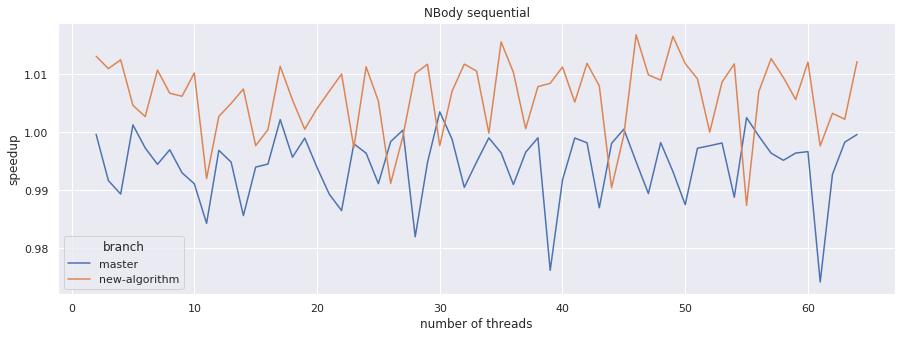

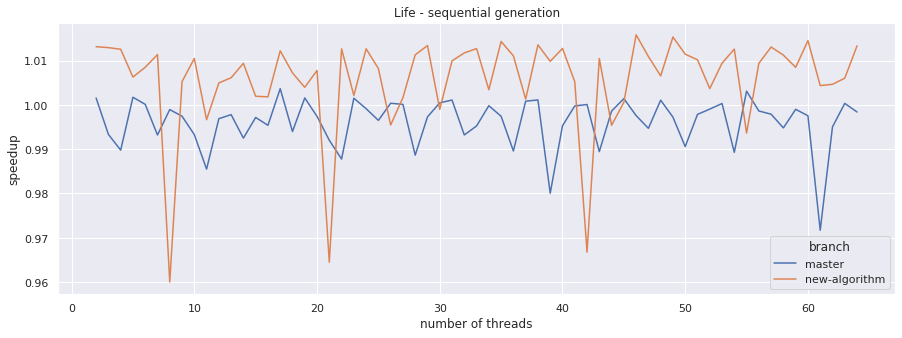

In [4]:
for algorithm in set(df['name']):
    fig, ax = plt.subplots(figsize=(15, 5))
    df_to_plot = df[df['name'] == algorithm]
    sns.lineplot(x='cores', y='speedup', hue='branch', data=df_to_plot, ax=ax);
    
    ax.set_title(algorithm)
    ax.set_ylabel('speedup')
    ax.set_xlabel('number of threads')